## Prove

In [3]:
from PIL import Image

In [9]:
filename = "P27/P2707758/MDC_png/MDC_156.png"
with Image.open(filename) as img:
    img.load()

img = img.convert("L") # gray scale

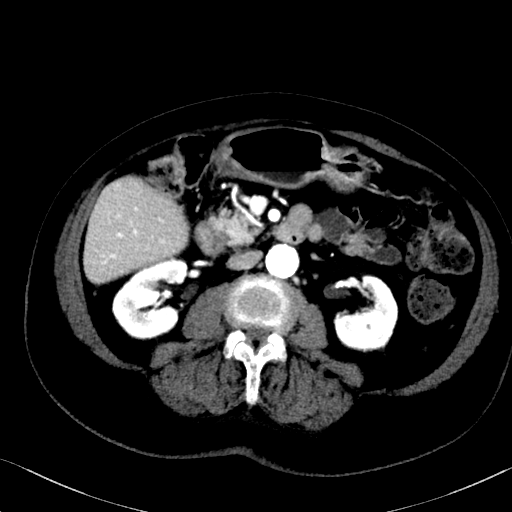

In [10]:
display(img)

In [30]:
threshold = 254

In [31]:
img_binarized = img.point(lambda x: 255 if x > threshold else 0)

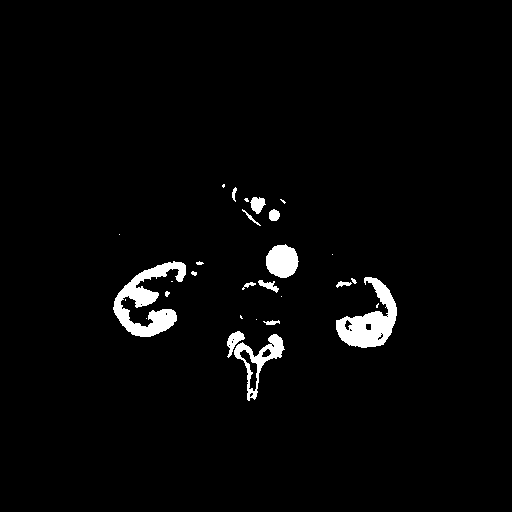

In [32]:
display(img_binarized)

In [1]:
import cv2
from matplotlib import pyplot as plt


In [42]:
im = cv2.imread(filename)
grey = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

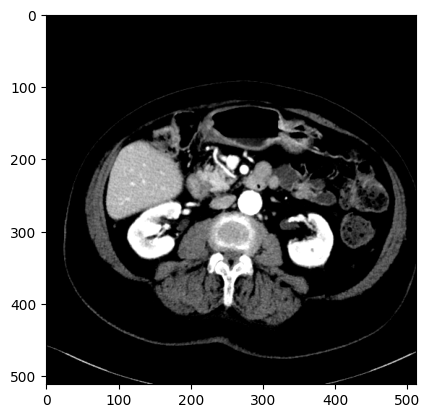

In [45]:
plt.imshow(grey, cmap='gray')

In [48]:
_, thresh = cv2.threshold(grey, 254, 255, cv2.THRESH_BINARY)


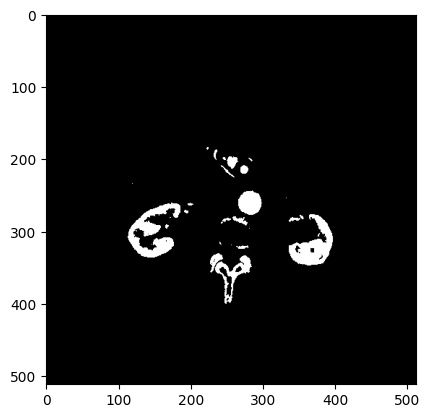

In [49]:
plt.imshow(thresh, cmap='gray')

In [81]:
ret, labels = cv2.connectedComponents(thresh)

In [2]:
import numpy as np
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    plt.imshow(labeled_img)

imshow_components(labels)

NameError: name 'labels' is not defined

In [103]:
totalLabels, label_ids, values, centroid = cv2.connectedComponentsWithStats(thresh)

In [150]:
output = np.zeros(thresh.shape, dtype="uint8")

In [151]:
# Loop through each component
for i in range(1, totalLabels):
    area = values[i, cv2.CC_STAT_AREA]  
    
    if (area > 300) and (area < 900):
        
        # Labels stores all the IDs of the components on the each pixel
        # It has the same dimension as the threshold
        # So we'll check the component
        # then convert it to 255 value to mark it white
        componentMask = (label_ids == i).astype("uint8") * 255
          
        # Creating the Final output mask
        output = cv2.bitwise_or(output, componentMask)
        #output = cv2.circle(output, tuple(centroid[i].astype(int)), radius=0, color=(0, 0, 255), thickness=2)


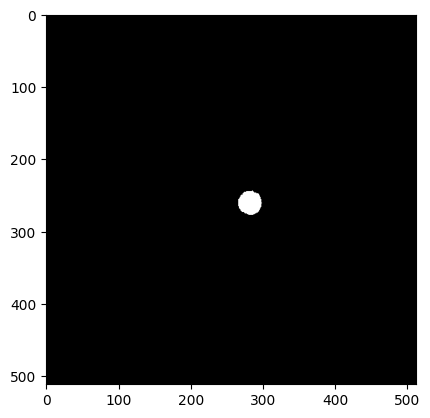

In [152]:
plt.imshow(output, cmap='gray')

## Funzione Finale

In [12]:
def do(img: np.ndarray, verbose=False):
    if verbose:
        plt.figure()
        plt.imshow(img, cmap='gray')
        plt.title('Original Img')

    # in grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # sogliatura e binarizzazione
    _, thresh = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY)

    if verbose:
        plt.figure()
        plt.imshow(thresh, cmap='gray')
        plt.title('Thresholded Img')

    # individuo le componenti connesse 
    totalLabels, label_ids, values, centroid = cv2.connectedComponentsWithStats(thresh)

    output = np.zeros(thresh.shape, dtype="uint8")
    # Loop through each component
    for i in range(1, totalLabels):
        area = values[i, cv2.CC_STAT_AREA]  
        
        if 900 < area:
            # Labels stores all the IDs of the components on the each pixel
            # It has the same dimension as the threshold
            # So we'll check the component
            # then convert it to 255 value to mark it white
            componentMask = (label_ids == i).astype("uint8") * 255
            
            # Creating the Final output mask
            output = cv2.bitwise_or(output, componentMask)
            #output = cv2.circle(output, tuple(centroid[i].astype(int)), radius=0, color=(0, 0, 255), thickness=2)
    
    if verbose:
        plt.figure()
        plt.imshow(output, cmap='gray')
        plt.title('Output Img')

    return output

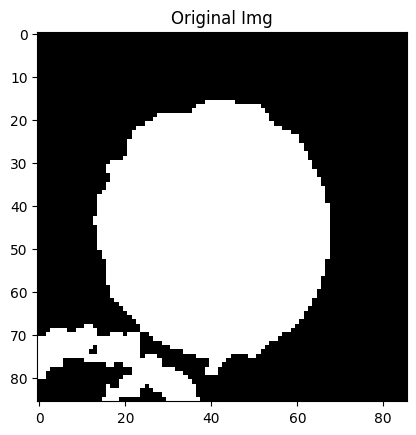

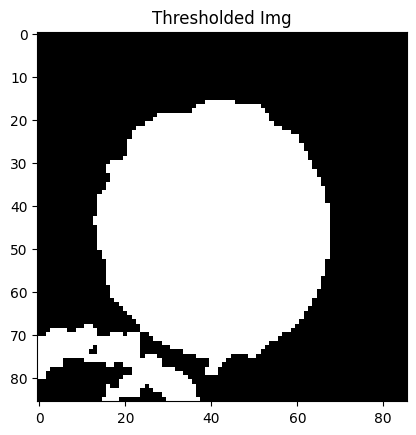

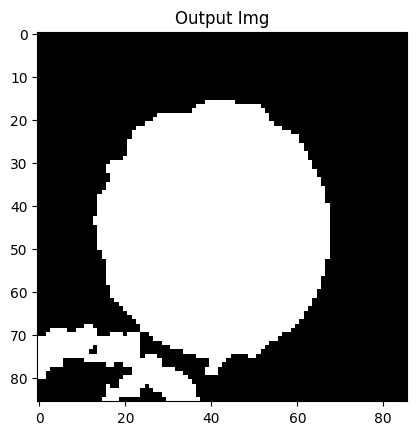

In [13]:
out_img = do(cv2.imread('/home/ncvescera/Desktop/Vinti/P25/P2490448/MDC_mask/MASK_MDC_crop0016.png'), True)